In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,r2_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load the dataset
dataset = pd.read_csv('Dataset/heart.csv')

print(dataset.shape)

dataset.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
cat_columns = dataset.columns[(dataset.dtypes=='object').values].tolist()
cat_columns

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [6]:
num_columns = dataset.columns[(dataset.dtypes!='object').values].tolist()
num_columns

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [7]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [9]:
for i in cat_columns:
    print(i,'\n\n')
    print(dataset[i].value_counts())
    print('--------------------')
    print('--------------------')

Sex 


M    725
F    193
Name: Sex, dtype: int64
--------------------
--------------------
ChestPainType 


ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
--------------------
--------------------
RestingECG 


Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
--------------------
--------------------
ExerciseAngina 


N    547
Y    371
Name: ExerciseAngina, dtype: int64
--------------------
--------------------
ST_Slope 


Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
--------------------
--------------------


In [10]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

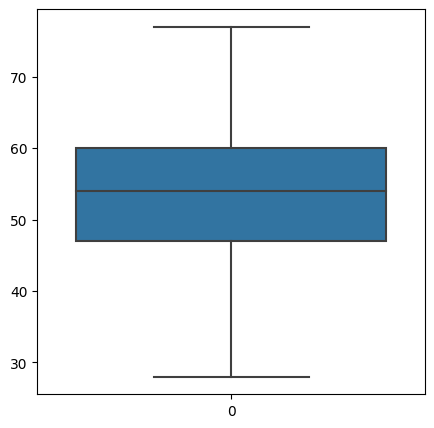

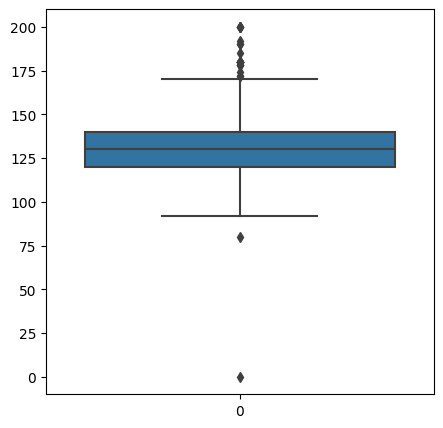

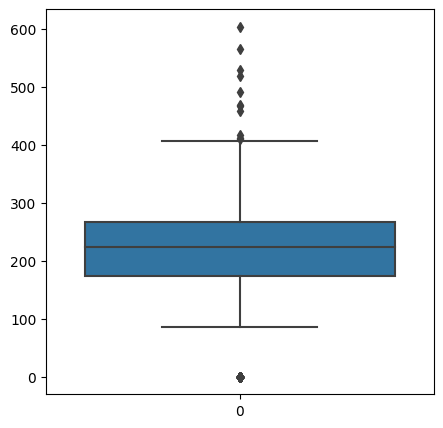

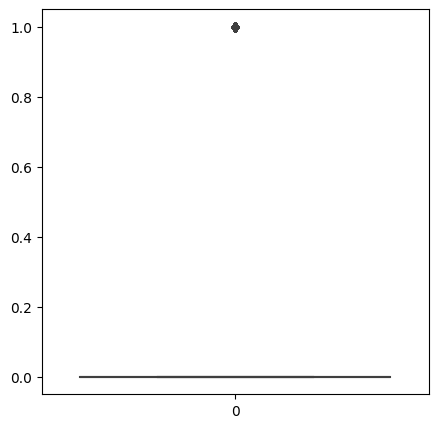

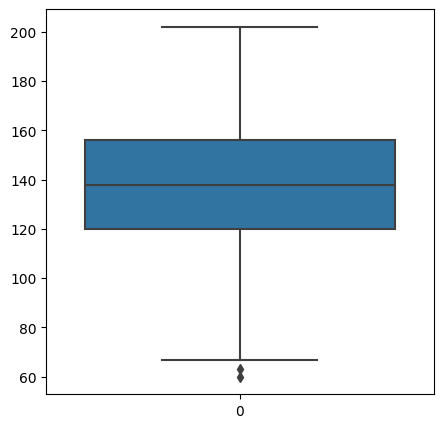

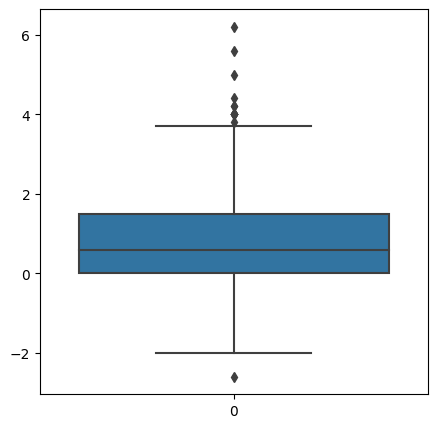

In [11]:
#create plot to dedect outliers
features = [
    'Age',
    'RestingBP',
    'Cholesterol',
    'FastingBS',
    'MaxHR',
    'Oldpeak']

for col in features:
    plt.figure(figsize=(5,5))
    sns.boxplot(dataset[col])

In [12]:
for column in dataset.columns:
    unique_vals = dataset[column].unique()
    nr_values = len(unique_vals)
    if nr_values < 20:
        print('The amount of possible options for the feature "{}": {} => {}'.format(column,nr_values,unique_vals))
    else:
        print('The amount of possible options for the feature "{}": {}'.format(column,nr_values))

The amount of possible options for the feature "Age": 50
The amount of possible options for the feature "Sex": 2 => ['M' 'F']
The amount of possible options for the feature "ChestPainType": 4 => ['ATA' 'NAP' 'ASY' 'TA']
The amount of possible options for the feature "RestingBP": 67
The amount of possible options for the feature "Cholesterol": 222
The amount of possible options for the feature "FastingBS": 2 => [0 1]
The amount of possible options for the feature "RestingECG": 3 => ['Normal' 'ST' 'LVH']
The amount of possible options for the feature "MaxHR": 119
The amount of possible options for the feature "ExerciseAngina": 2 => ['N' 'Y']
The amount of possible options for the feature "Oldpeak": 53
The amount of possible options for the feature "ST_Slope": 3 => ['Up' 'Flat' 'Down']
The amount of possible options for the feature "HeartDisease": 2 => [0 1]


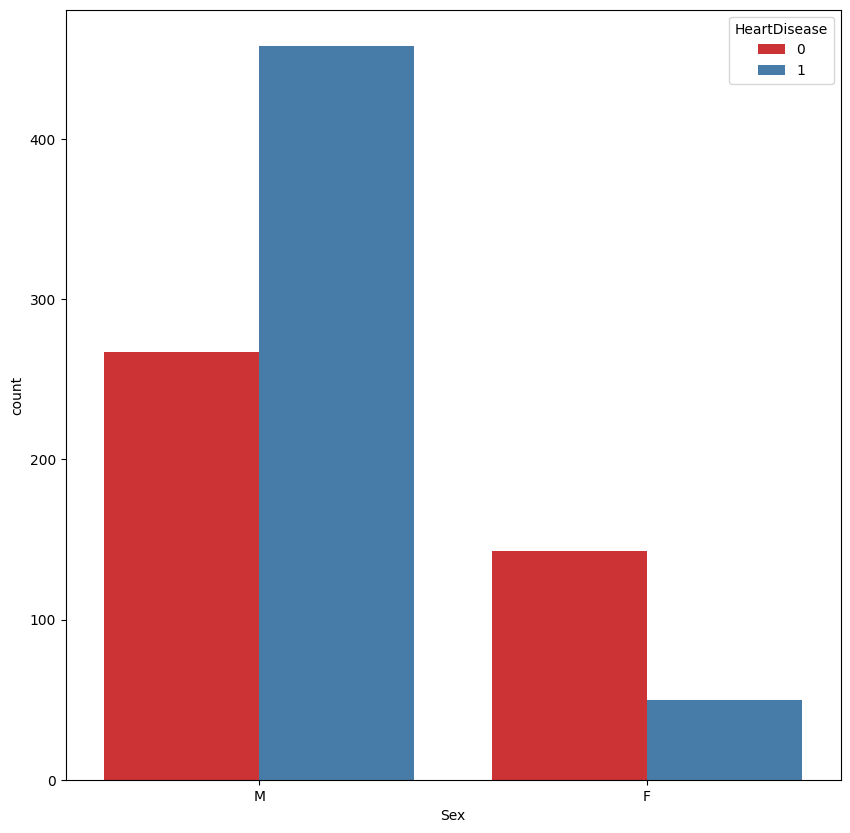

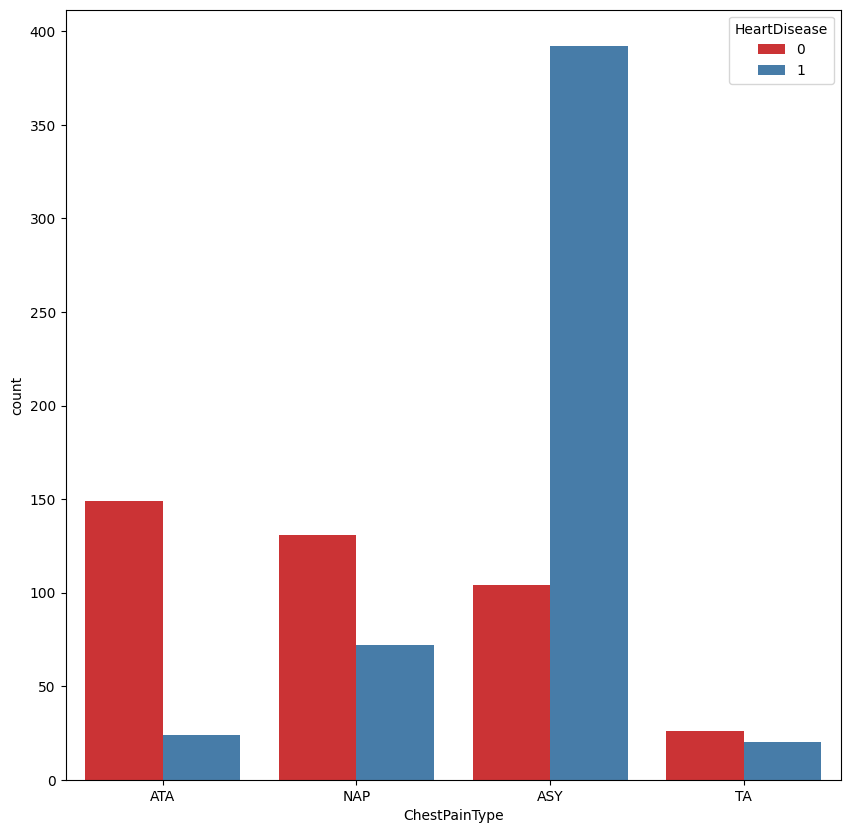

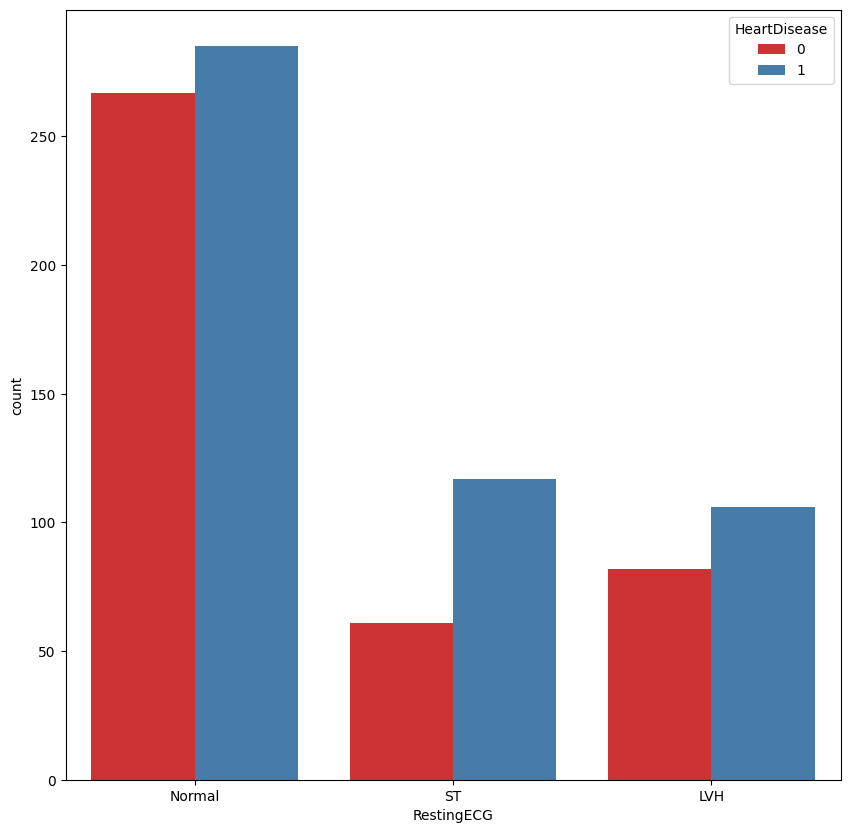

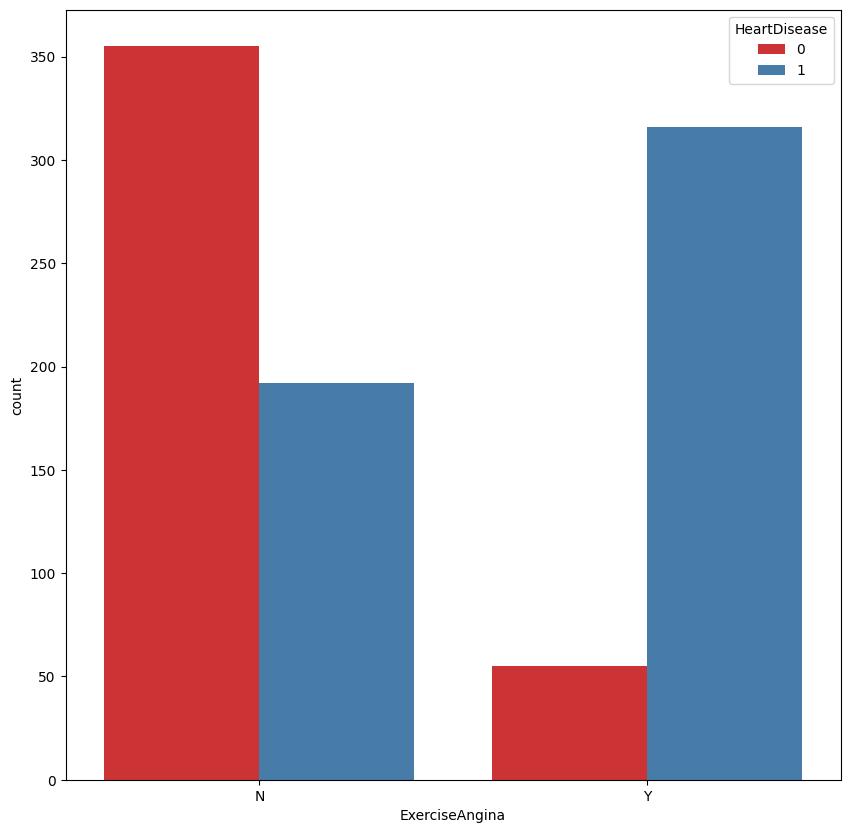

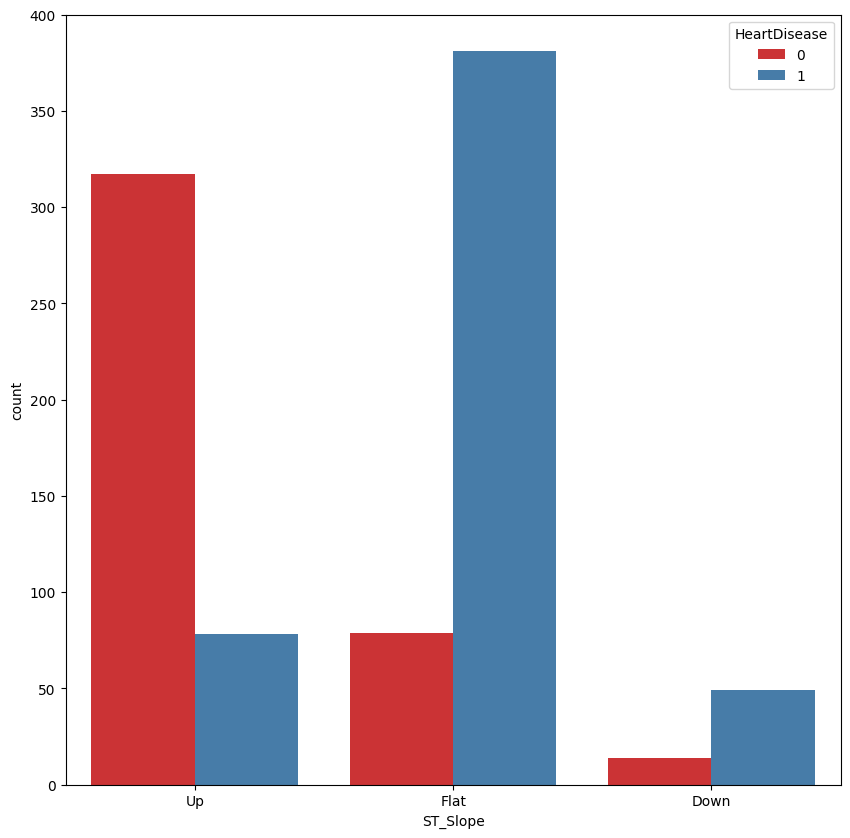

In [13]:
# Visualize categorical features
features = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

for f in features:
    plt.figure(figsize=(10,10))
    ax = sns.countplot(x=f,data=dataset,hue='HeartDisease',palette='Set1')

In [14]:
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
    globals()['LE_{}'.format(col)] = LabelEncoder()
    dataset[col] = globals()['LE_{}'.format(col)].fit_transform(dataset[col])
    
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [15]:
for column in dataset:
    unique_vals = np.unique(dataset[column])
    nr_values = len(unique_vals)
    if nr_values < 20:
        print('The amount of possible options for a feature {} : {} =>{}'.format(column,nr_values,unique_vals))
    else:
        print('The amount of possible options for a feature {} : {}'.format(column,nr_values))

The amount of possible options for a feature Age : 50
The amount of possible options for a feature Sex : 2 =>[0 1]
The amount of possible options for a feature ChestPainType : 4 =>[0 1 2 3]
The amount of possible options for a feature RestingBP : 67
The amount of possible options for a feature Cholesterol : 222
The amount of possible options for a feature FastingBS : 2 =>[0 1]
The amount of possible options for a feature RestingECG : 3 =>[0 1 2]
The amount of possible options for a feature MaxHR : 119
The amount of possible options for a feature ExerciseAngina : 2 =>[0 1]
The amount of possible options for a feature Oldpeak : 53
The amount of possible options for a feature ST_Slope : 3 =>[0 1 2]
The amount of possible options for a feature HeartDisease : 2 =>[0 1]


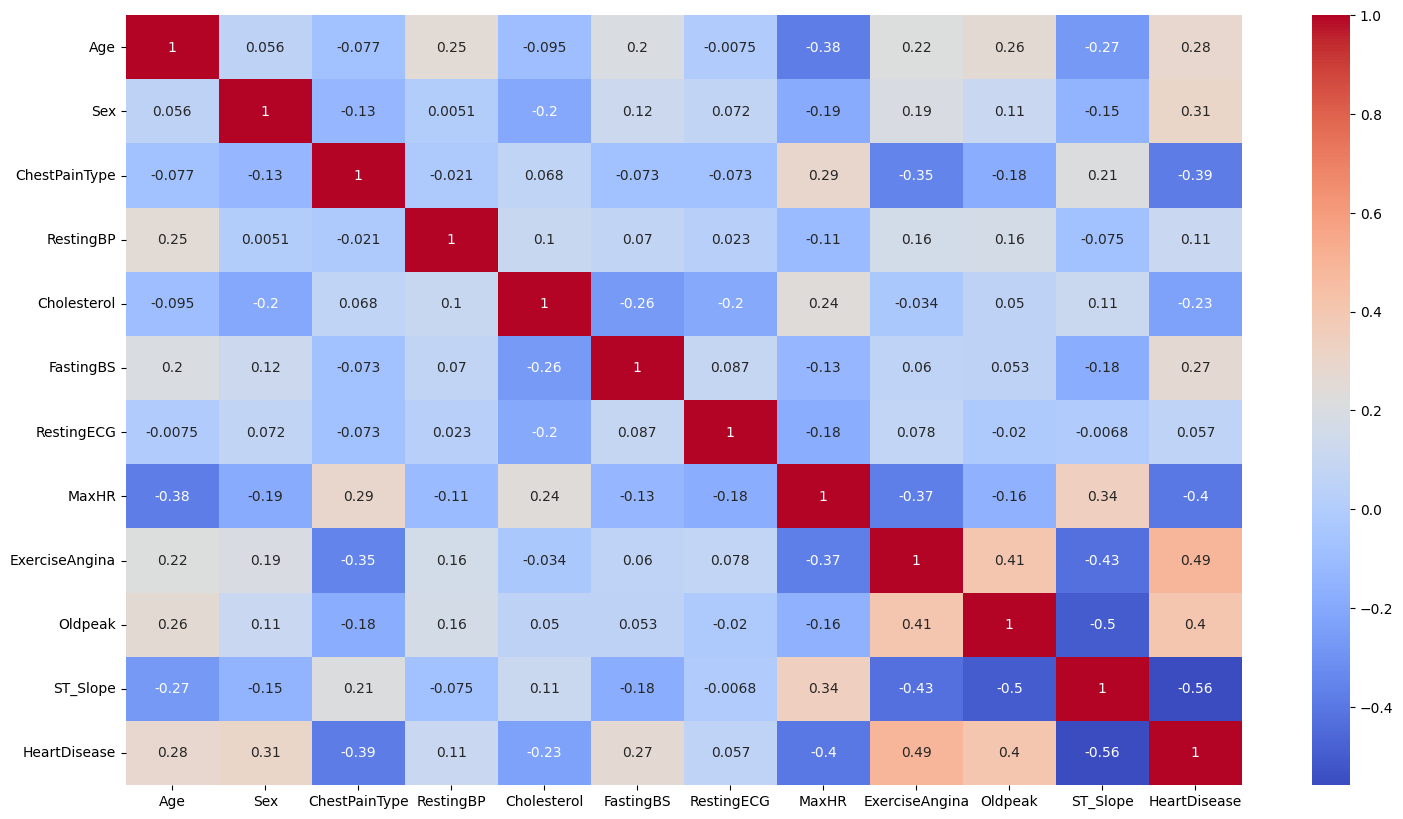

In [16]:
#Correlation
plt.figure(figsize = (18,10))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.show()

In [17]:
#Splite the dataset into testing and training
X = dataset.drop('HeartDisease', axis=1)
y = dataset['HeartDisease']
print('X shape : {}'.format(np.shape(X)))
print('Y shape : {}'.format(np.shape(y)))

# 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('X_train shape: {}'.format(np.shape(X_train)))
print('X_test shape: {}'.format(np.shape(X_test)))

X shape : (918, 11)
Y shape : (918,)
X_train shape: (642, 11)
X_test shape: (276, 11)


# 1.SVM

In [18]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True lable')
    plt.xlabel('Predicted lable')

In [19]:
#Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model.fit(X_train,y_train)

#Predict the response for test dataset
svm_predict = svm_model.predict(X_train)

In [20]:
# Accuracy on Train
print("Accuracy in Training: ", svm_model.score(X_train,y_train))
# Accuracy on Test
print("Accuracy in Testing: ", svm_model.score(X_test,y_test))

Accuracy in Training:  0.8566978193146417
Accuracy in Testing:  0.8369565217391305


Confusion Matrix: 
 [[245  52]
 [ 40 305]]


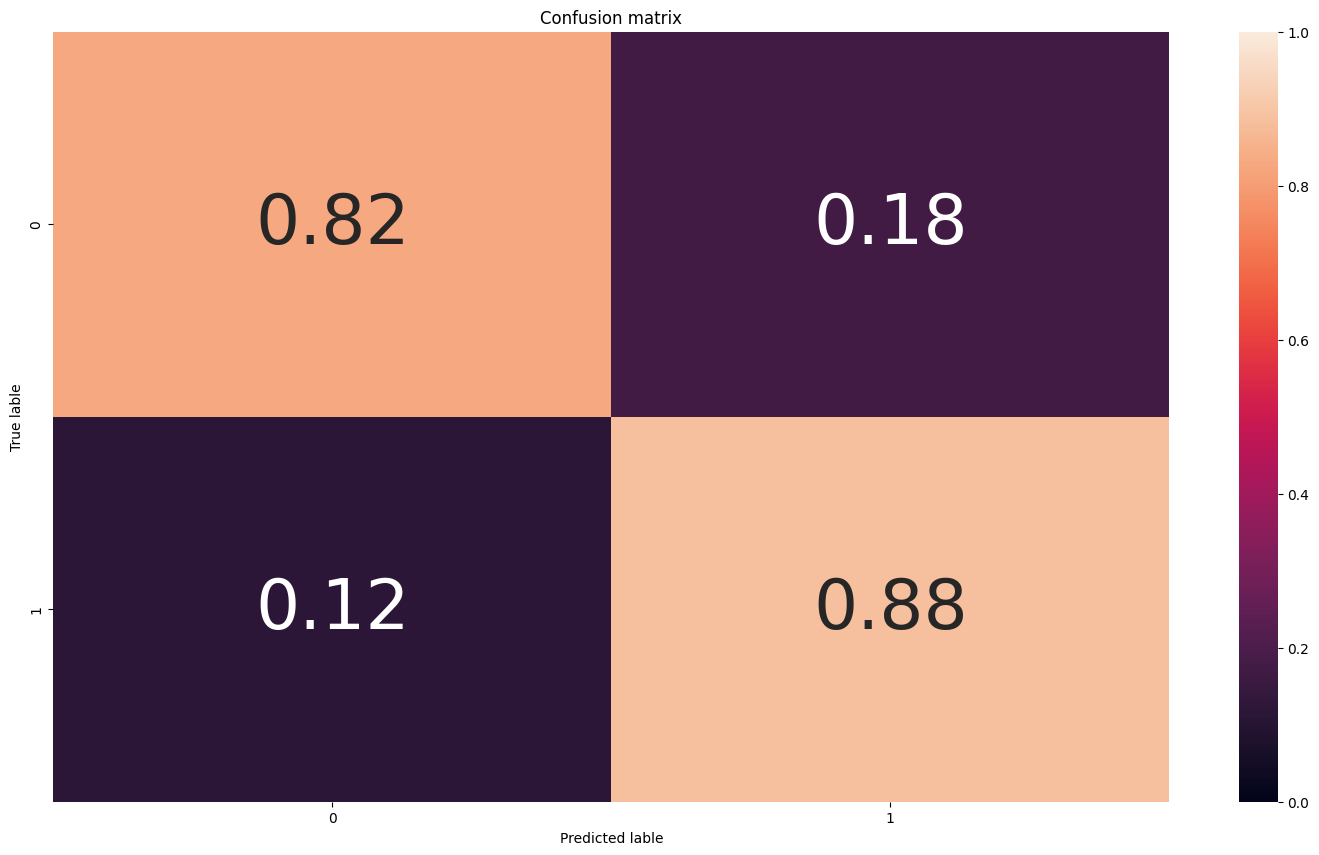

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_train, svm_predict)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(18,10))
plot_confusion_matrix(cm_norm, classes=svm_model.classes_)

print('Confusion Matrix: \n', cm)

# 2.KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier()

knn_model.fit(X_train,y_train)

knn_predict=knn_model.predict(X_train)

Accuracy in Training:  0.7928348909657321
Accuracy in Testing:  0.6956521739130435
Confusion Matrix: 
 [[223  74]
 [ 59 286]]


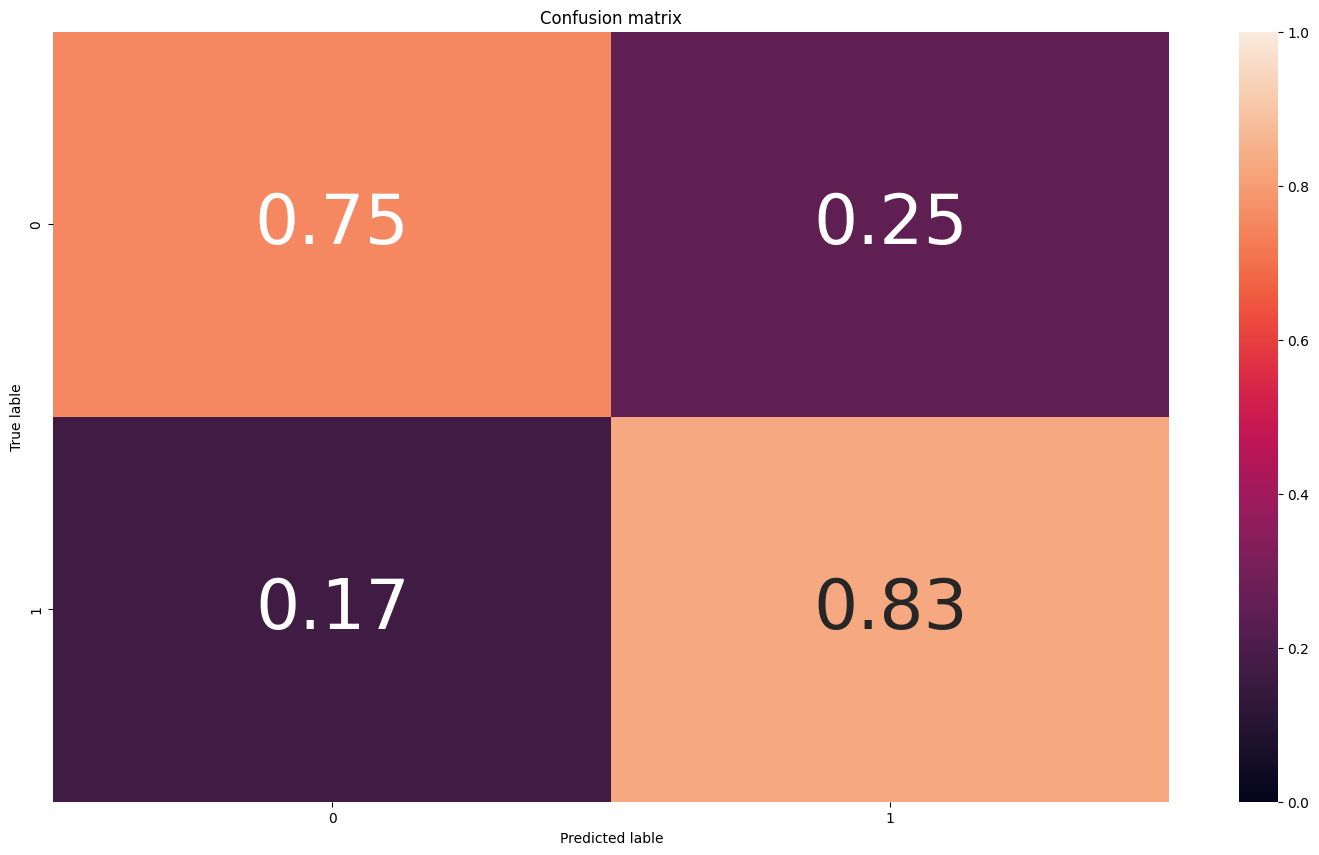

In [23]:
# Accuracy on Train
print("Accuracy in Training: ", knn_model.score(X_train,y_train))
# Accuracy on Test
print("Accuracy in Testing: ", knn_model.score(X_test,y_test))

# Confusion Matrix
cm = confusion_matrix(y_train, knn_predict)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(18,10))
plot_confusion_matrix(cm_norm, classes=knn_model.classes_)

print('Confusion Matrix: \n', cm)

# 3.Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

naivebay_model=GaussianNB()

naivebay_model.fit(X_train,y_train)

naivebay_predict=naivebay_model.predict(X_train)

Accuracy in Training:  0.8613707165109035
Accuracy in Testing:  0.8586956521739131
Confusion Matrix: 
 [[256  41]
 [ 48 297]]


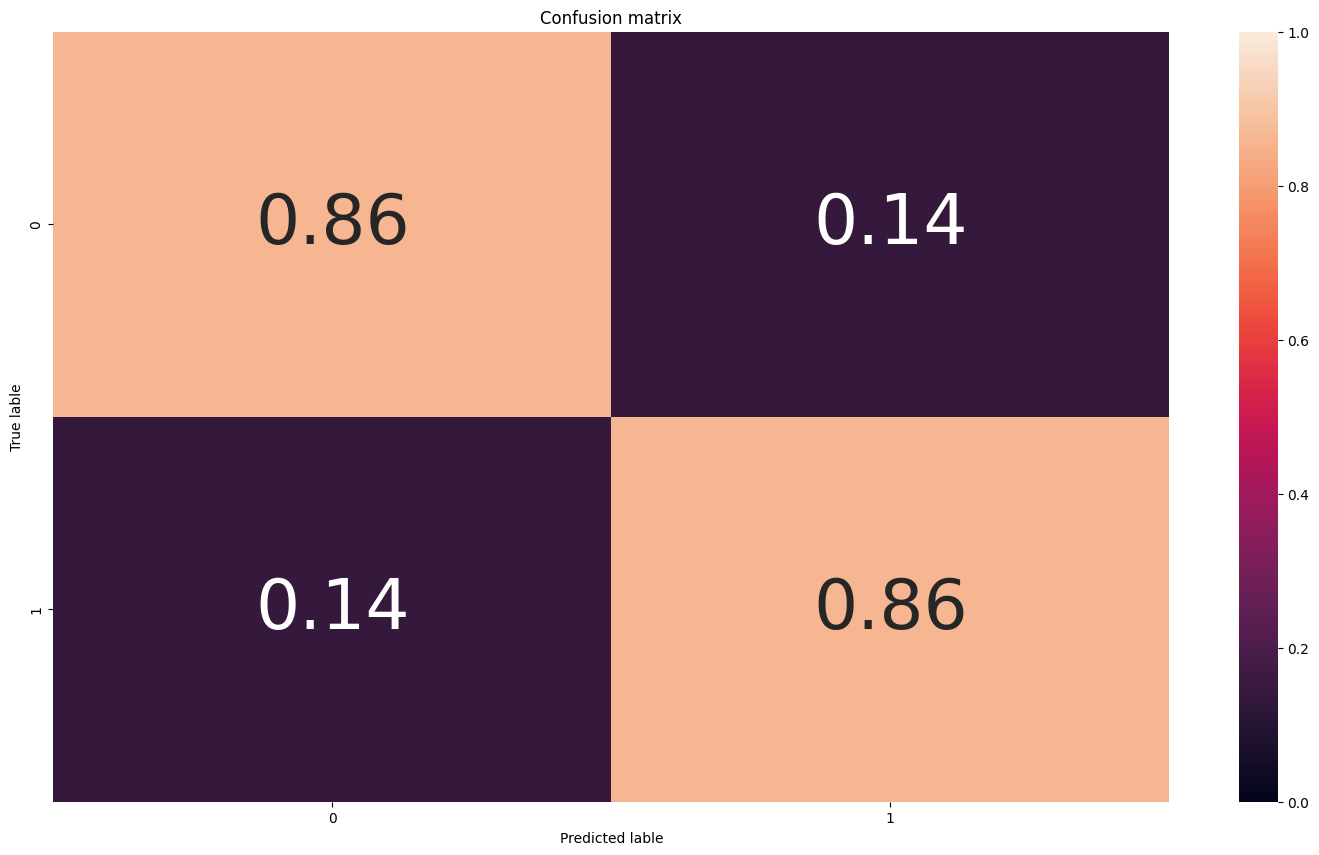

In [25]:
# Accuracy on Train
print("Accuracy in Training: ", naivebay_model.score(X_train,y_train))
# Accuracy on Test
print("Accuracy in Testing: ", naivebay_model.score(X_test,y_test))

# Confusion Matrix
cm = confusion_matrix(y_train, naivebay_predict)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(18,10))
plot_confusion_matrix(cm_norm, classes=knn_model.classes_)

print('Confusion Matrix: \n', cm)

# 4.Decision Tree

In [26]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, classes=None, title = 'confusion matrix'):
    if classes is not None:
        sns.heatmap(cm,xticklabels=classes, yticklabels=classes, vmin=0,annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0, vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
decision_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

decision_model.fit(X_train, y_train)

decision_predict = decision_model.predict(X_train)

In [28]:
# Accuracy on Train
print("Accuracy in Training: ", decision_model.score(X_train,y_train))
# Accuracy on Test
print("Accuracy in Testing: ", decision_model.score(X_test,y_test))

Accuracy in Training:  0.897196261682243
Accuracy in Testing:  0.8260869565217391


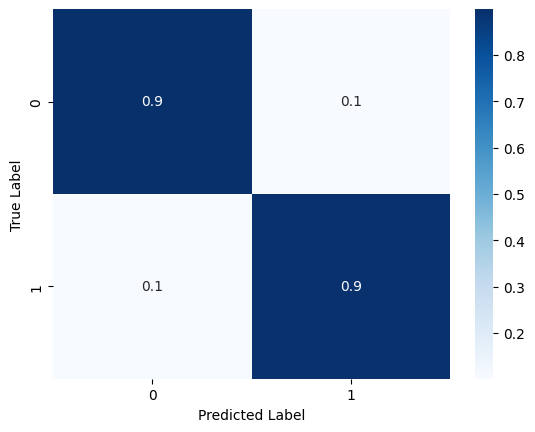

Confusion Matrix for : 
 [[267  30]
 [ 36 309]]


In [29]:
# Confusion Matrix
cm = confusion_matrix(y_train, decision_predict)
cm_norm = cm/cm.sum(axis=1)[:,np.newaxis]
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('Confusion Matrix for : \n', cm)

# Compare score for all models

In [30]:
#Comparing all model accuracy
svm_R2=r2_score(y_train,svm_predict)
knn_R2=r2_score(y_train,knn_predict)
naivebay_R2=r2_score(y_train,naivebay_predict)
decisiont_R2=r2_score(y_train,decision_predict)

print('SVM model score : ', svm_R2)
print('KNN model score : ', knn_R2)
print('Naive Bayes model score : ', naivebay_R2)
print('Decision Tree model score : ', decisiont_R2)

SVM model score :  0.4235690235690237
KNN model score :  0.1666813058117408
Naive Bayes model score :  0.44236568584394687
Decision Tree model score :  0.5864734299516909


# Compare Models

<BarContainer object of 4 artists>

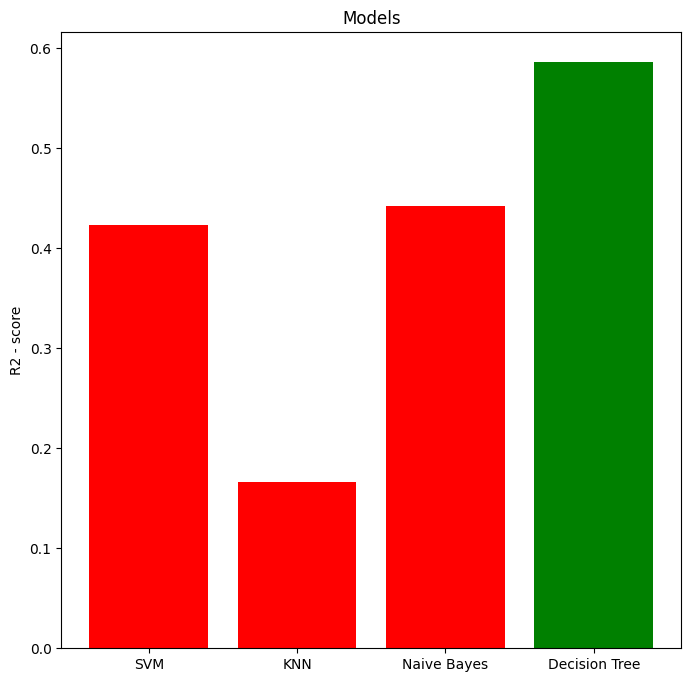

In [31]:
#comparing the all models
models = ['SVM', 'KNN', 'Naive Bayes', 'Decision Tree']
n = [svm_R2, knn_R2, naivebay_R2, decisiont_R2]
y_pos = np.arange(len(models))
highlights = ['red' if (x < max(n)) else 'green' for x in n]


plt.figure(figsize=(8,8))
plt.xticks(y_pos, models)
plt.ylabel('R2 - score')
plt.title('Models')
plt.bar(y_pos, n, color=highlights)

# Predict heart disease Using Decision tree model

In [32]:
#Heart disease patient
Age = 40
Sex = 1
ChestPainType = 1
RestingBP = 130
Cholesterol = 250
FastingsBS = 0
RestingECG = 1
MaxHR = 130
ExerciseAngina = 0
Oldpeak = 1.0
ST_Slope = 1

In [33]:
predict_hd = decision_model.predict([[Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingsBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak, ST_Slope]])
print('Predict Heart Disease : ', predict_hd)

Predict Heart Disease :  [0]


In [34]:
#Don`t have Heart disease patient
Age = 60
Sex = 1
ChestPainType = 1
RestingBP = 130
Cholesterol = 350
FastingsBS = 1
RestingECG = 1
MaxHR = 230
ExerciseAngina = 0
Oldpeak = 1.0
ST_Slope = 1

In [35]:
predict_hd = decision_model.predict([[Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingsBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak, ST_Slope]])
print('Predict Heart Disease : ', predict_hd)

Predict Heart Disease :  [1]
